# Festive vs NonFestive Season Attack in India

In [2]:
import pandas as pd
import os
import glob
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [4]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        terror=pd.read_csv(source, low_memory=False)
        
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
attack_festive_india = terror[(terror.country_txt == 'India') & (terror.imonth.isin([1,3,8,10,11,12]))].groupby('iyear').size().to_frame(name = 'festive_attack').reset_index()
death_festive_india = terror[(terror.country_txt == 'India') & (terror.imonth.isin([1,3,8,10,11,12]))].groupby('iyear')['nkill'].sum().to_frame(name = 'festive_death').astype(int).reset_index()

attack_nonfestive_india = terror[(terror.country_txt == 'India') & (terror.imonth.isin([2,4,5,6,7,9]))].groupby('iyear').size().to_frame(name = 'nonfestive_attack').reset_index()
death_nonfestive_india = terror[(terror.country_txt == 'India') & (terror.imonth.isin([2,4,5,6,7,9]))].groupby('iyear')['nkill'].sum().to_frame(name = 'nonfestive_death').astype(int).reset_index()

terror_join_fes_nonfes = pd.merge(attack_festive_india, attack_nonfestive_india, on = 'iyear', how = 'inner')
terror_join_fes_death = pd.merge(terror_join_fes_nonfes, death_festive_india, on = 'iyear', how = 'inner')
terror_join_nonfes_death = pd.merge(terror_join_fes_death, death_nonfestive_india, on = 'iyear', how = 'inner')

terror_compare = terror_join_nonfes_death.sort_values(['iyear'], ascending = False)

terror_compare['festive_attack_prcntg'] = round(terror_compare[['festive_attack']] / 6, 2)
terror_compare['nonfestive_attack_prcntg'] = round(terror_compare[['nonfestive_attack']] / 6, 2)

terror_compare['festive_death_prcntg'] = round(terror_compare[['festive_death']] / 6, 2)
terror_compare['nonfestive_death_prcntg'] = round(terror_compare[['nonfestive_death']] / 6, 2)

terror_compare = terror_compare.rename(columns={'iyear':'year'})

terror_compare.head()

,year,festive_attack,nonfestive_attack,festive_death,nonfestive_death,festive_attack_prcntg,nonfestive_attack_prcntg,festive_death_prcntg,nonfestive_death_prcntg
35,2015,463,419,154,233,77.17,69.83,25.67,38.83
34,2014,404,456,277,213,67.33,76.00,46.17,35.50
33,2013,355,339,211,256,59.17,56.50,35.17,42.67
32,2012,294,317,125,139,49.00,52.83,20.83,23.17
31,2011,287,356,166,318,47.83,59.33,27.67,53.00


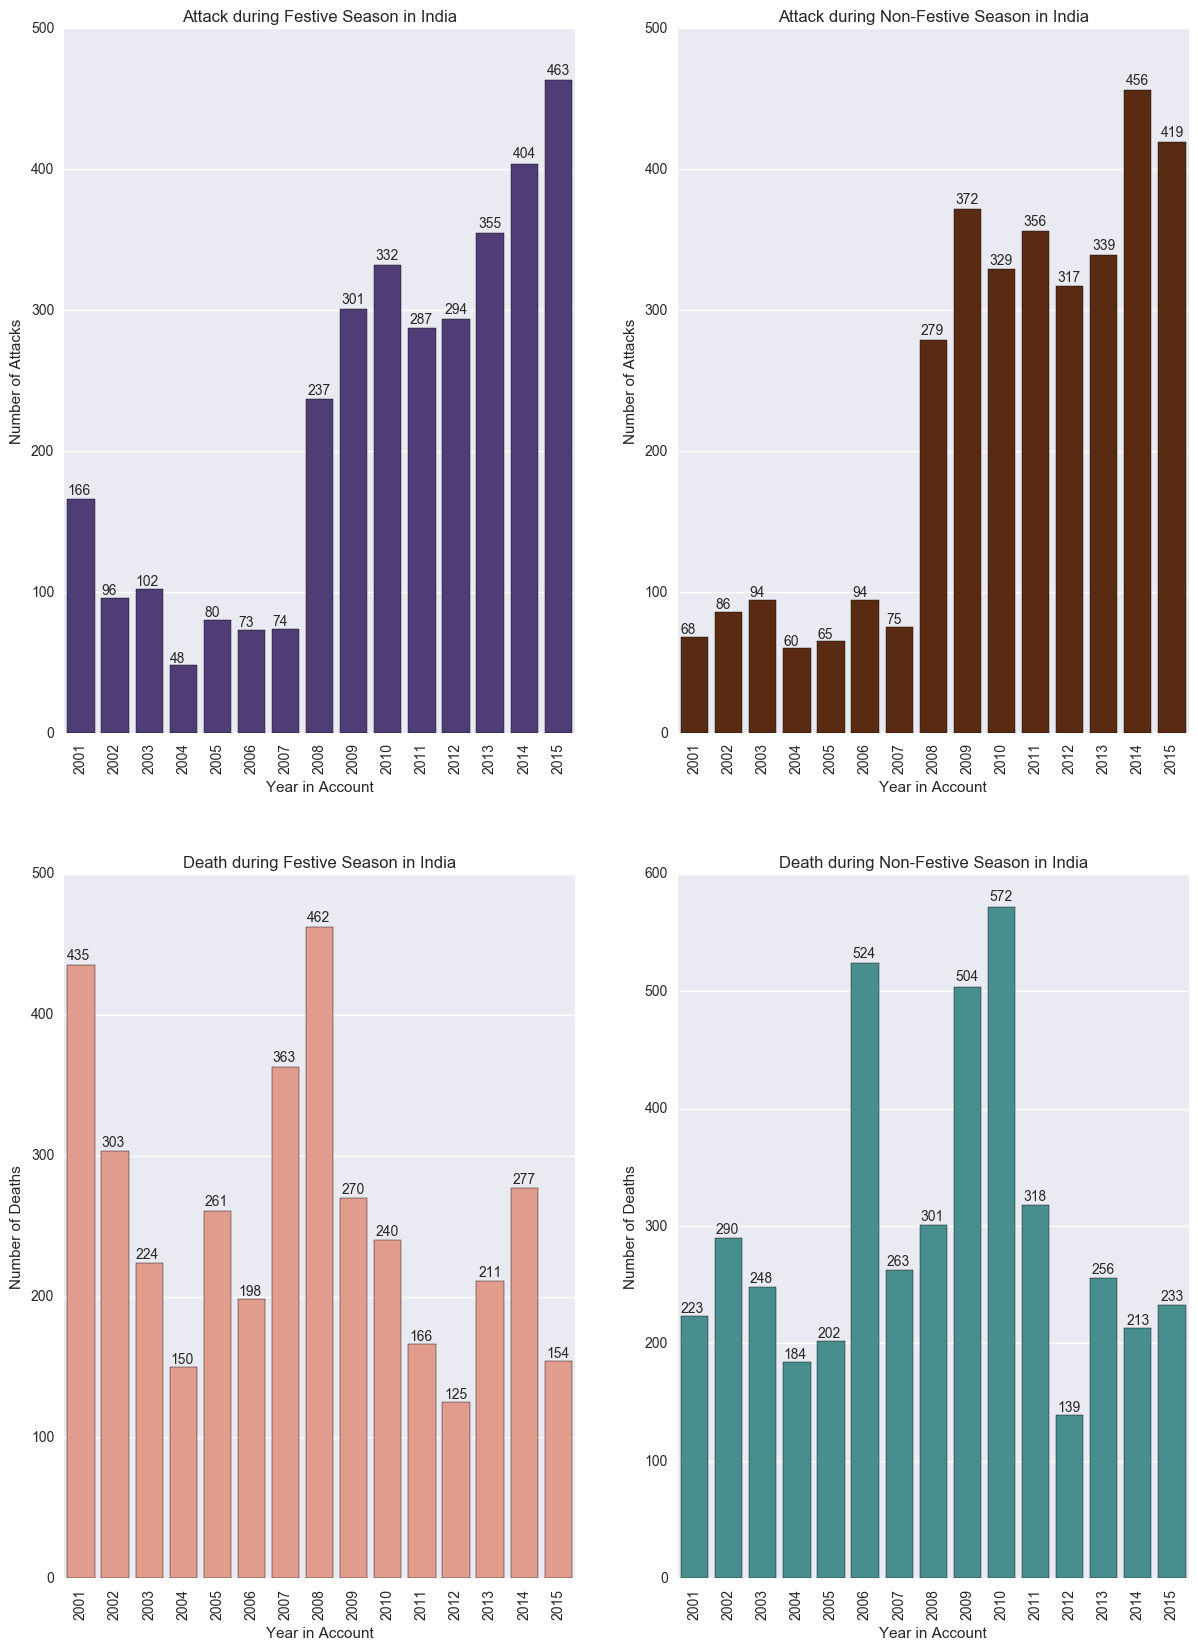

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1 = sns.barplot(x="year", y="festive_attack", data=terror_compare.head(15), ax=ax1, color="#4c337f") 
ax1.set_title('Attack during Festive Season in India')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Number of Attacks")

ax2 = sns.barplot(x="year", y="nonfestive_attack", data=terror_compare.head(15), ax=ax2, color="#662707") 
ax2.set_title('Attack during Non-Festive Season in India')
ax2.set_xlabel("Year in Account")
ax2.set_ylabel("Number of Attacks")

ax3 = sns.barplot(x="year", y="festive_death", data=terror_compare.head(15), ax=ax3, color="#ee957f") 
ax3.set_title('Death during Festive Season in India')
ax3.set_xlabel("Year in Account")
ax3.set_ylabel("Number of Deaths")

ax4 = sns.barplot(x="year", y="nonfestive_death", data=terror_compare.head(15), ax=ax4, color="#3d9999") 
ax4.set_title('Death during Non-Festive Season in India')
ax4.set_xlabel("Year in Account")
ax4.set_ylabel("Number of Deaths")

plt.subplots_adjust(right=2, top=4)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
plt.savefig('ana_1\\festiveVSnonfestive.png', bbox_inches='tight')

### It can be seen from the above graphs that:
    - It is normal trend to believe that terrorist attacks in India occur during festive season 
      when more number of people are gathered together to celebrate the festival.
    - The two graphs above shows a contrasting story.
    - More or comparable number of attacks occur during non festive season.
    - More or comparable number of people dies during non festive season.
    - So government should tighten the security throughout the year rather than just during
      the festive season. 
    - It will minimize the number of deaths that happens due to the terrorist attacks throughout the year.